[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jmou2/PaviaProteinDesign/blob/main/01_Monday/intro_to_python_tools.ipynb)

In [ ]:
! pip install prody

import prody as pr

# Introduction to ProDy

ProDy (Protein Dynamics and Sequence Analysis) is a python package that allows for structure-based analysis and manipulation of protein structures from PDB files. We use ProDy for tasks such as:

- selection of specific parts of strucutres (i.e. chain and residue selections)
- read and write b-factors in a file 
- get the sequence of a PDB file
- alignment of structures and calculation of RMSD (root mean squared deviation)
- classify secondary structure (alpha, beta, loop)

### 1 - Loading and visualizing a PDB file

The following is an adapted version of the ProDy tutorials found on the [online documentation](http://prody.csb.pitt.edu/tutorials/prody_tutorial/basics.html#file-parsers).

Note that we have used `import prody as pr` at the top of this notebook so we will call all functions using `pr.function` from now on.

#### 1.1 - Parsing files using `AtomGroup` objects

To work with PDB files in ProDy, we need to parse the file into a ProDy [Atom Group](http://prody.csb.pitt.edu/manual/reference/atomic/atomgroup.html). The `AtomGroup` class stores information from our PDB file, such as atoms and their coordinates, chain and segment IDs, and b-factors.

Similar to in pymol, we can simply list a PDB ID to download the PDB file from the RCSB website. We can also download a file and parse it ourselves.

In [4]:
# Load a PDB file by simply listing the PDB ID
able = pr.parsePDB('6w70')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 6w70 downloaded (6w70.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 4150 atoms and 1 coordinate set(s) were parsed in 0.11s.


In [60]:
# Load a PDB file that we have saved locally or in Drive
able_apo = pr.parsePDB('6w6x.pdb')

@> 4112 atoms and 1 coordinate set(s) were parsed in 0.03s.


#### 1.2 - Exploring information in `AtomGroup` objects 

We can visualize and list information about our PDB file using the following methods:

In [11]:
# we can retrieve the numbers of atoms, residues, chains, and segments
# we store them in variables and print them out after

num_atoms = able.numAtoms()
num_residues = able.numResidues()
num_chains = able.numChains()
num_segments = able.numSegments()

print(f'Number of atoms: {num_atoms}')
print(f'Number of residues: {num_residues}')
print(f'Number of chains: {num_chains}')
print(f'Number of segments: {num_segments}')

Number of atoms: 4150
Number of residues: 529
Number of chains: 2
Number of segments: 0


In [21]:
# we can also retrieve the atom names, residue names, chain names, and coordinates of the atoms

atom_names = able.getNames()
residue_names = able.getResnames()
chain_names = able.getChids()
segment_names = able.getSegnames()
coords = able.getCoords()
sequence = able.getSequence()

# these are stored in lists, so we can print out the first 10 of each
print(f'First 10 atom names: {atom_names[:10]}')
print(f'First 10 residue names: {residue_names[:10]}')
print(f'First 10 chain names: {chain_names[:10]}')
print(f'First 10 segment names: {segment_names[:10]}')

print(f'First 10 coordinates: \n {coords[:10]}')

print(f'First 10 of sequence: {sequence[:10]}')

print(f'Length of atom names: {len(atom_names)}')
print(f'Shape of coordinates: {coords.shape}')

First 10 atom names: ['N' 'CA' 'C' 'O' 'CB' 'OG' 'N' 'CA' 'C' 'O']
First 10 residue names: ['SER' 'SER' 'SER' 'SER' 'SER' 'SER' 'VAL' 'VAL' 'VAL' 'VAL']
First 10 chain names: ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
First 10 segment names: ['' '' '' '' '' '' '' '' '' '']
First 10 coordinates: 
 [[13.575 -6.718 18.494]
 [12.134 -6.776 18.458]
 [11.659 -6.005 17.244]
 [12.471 -5.429 16.487]
 [11.555 -6.164 19.733]
 [12.023 -4.84  19.92 ]
 [10.339 -6.025 17.044]
 [ 9.735 -5.112 16.083]
 [10.016 -3.674 16.488]
 [10.292 -2.823 15.643]]
First 10 of sequence: SSSSSSVVVV
Length of atom names: 4150
Shape of coordinates: (4150, 3)


The information above is parsed on a **per-atom basis**, in the order that they appear in the PDB file. We will get a list that is the length of the number of atoms, not the number of residues. In the above example, SER is the first residue and has 6 atoms, so we see it repeated 6 times in the `residue_names` list.

Also note that there are no segment IDs in this PDB file, so we just see empty strings in the `segment_names` list.

Sometimes, we would like to know information on a per-residue, rather than a per-atom basis. In this case it is helpful to select just the C-alpha atoms of every residue using `.ca.getResnames()`

In [24]:
# get a list of residue names using just the ca coordinates 
residue_names_ca = able.ca.getResnames()
# also get the sequence using just the ca coordinates
sequence_ca = able.ca.getSequence()

print(f'Sequence using ca: {sequence_ca}')
print(f'Residue names using ca: {residue_names_ca}')


Sequence using ca: SVKSEYAEAAAVGQEAVAVFNTMKAAFQNGDKEAVAQYLARLASLYTRHEELLNRILEKARREGNKEAVTLMNEFTATFQTGKSIFNAMVAAFKNGDDDSFESYLQALEKVTAKGETLADQIAKALSVKSEYAEAAAVGQEAVAVFNTMKAAFQNGDKEAVAQYLARLASLYTRHEELLNRILEKARREGNKEAVTLMNEFTATFQTGKSIFNAMVAAFKNGDDDSFESYLQALEKVTAKGETLADQIAKAL
Residue names using ca: ['SER' 'VAL' 'LYS' 'SER' 'GLU' 'TYR' 'ALA' 'GLU' 'ALA' 'ALA' 'ALA' 'VAL'
 'GLY' 'GLN' 'GLU' 'ALA' 'VAL' 'ALA' 'VAL' 'PHE' 'ASN' 'THR' 'MET' 'LYS'
 'ALA' 'ALA' 'PHE' 'GLN' 'ASN' 'GLY' 'ASP' 'LYS' 'GLU' 'ALA' 'VAL' 'ALA'
 'GLN' 'TYR' 'LEU' 'ALA' 'ARG' 'LEU' 'ALA' 'SER' 'LEU' 'TYR' 'THR' 'ARG'
 'HIS' 'GLU' 'GLU' 'LEU' 'LEU' 'ASN' 'ARG' 'ILE' 'LEU' 'GLU' 'LYS' 'ALA'
 'ARG' 'ARG' 'GLU' 'GLY' 'ASN' 'LYS' 'GLU' 'ALA' 'VAL' 'THR' 'LEU' 'MET'
 'ASN' 'GLU' 'PHE' 'THR' 'ALA' 'THR' 'PHE' 'GLN' 'THR' 'GLY' 'LYS' 'SER'
 'ILE' 'PHE' 'ASN' 'ALA' 'MET' 'VAL' 'ALA' 'ALA' 'PHE' 'LYS' 'ASN' 'GLY'
 'ASP' 'ASP' 'ASP' 'SER' 'PHE' 'GLU' 'SER' 'TYR' 'LEU' 'GLN' 'ALA' 'LEU'
 'GLU' 'LYS' 'VAL' 'THR' 'ALA' 'LYS' 'GLY' 'GLU

#### 1.3 - Visualizing proteins using `pr.showProtein()` verus Pymol

Lastly, we can visualize a PDB file using a coarse-grained plotting function built into ProDy. It is not very detailed compared to PyMol but can help you quickly see what you are dealing with.

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

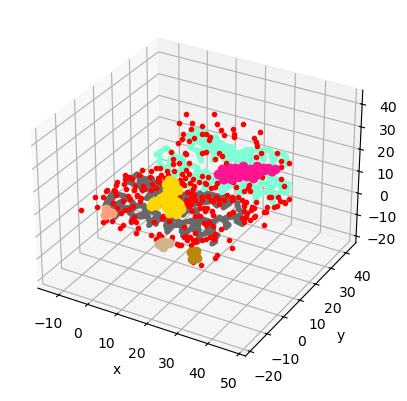

In [26]:
pr.showProtein(able)

Using the above, we can see that the structure we are dealing with has the following properties:
- there are 2 chains in the asymmetric unit
- there are a number of small-molecules, some of which we care about (a ligand) and some of which are irrelevant (solvent molecules)
- there are also a number of waters (red dots above) in the structure

**Mini exercise:** Open this PDB file both in pymol and as text file and see if you can spot the different types of atoms and chains in the file.

### 2 - Selecting subsets of PDB files

We often only want to deal with certain atoms and objects within a PDB file. ProDy makes it very easy to do this using atom selections.

#### 2.1 - Quick selection strings

We create atom selection by appending `.select('selection string')` where the selection string is a language-based description of what we would like to select. The easiest way to learn is by viewing examples below and on the ProDy [online tutorial for selections](http://prody.csb.pitt.edu/manual/reference/atomic/select.html).

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

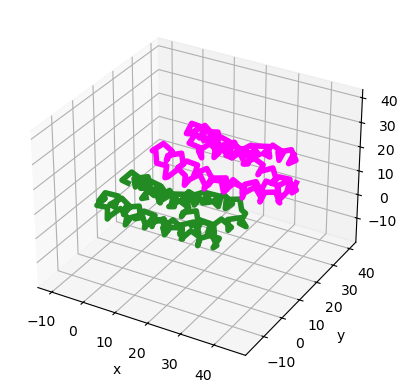

In [28]:
# select just the protein atoms
protein = able.select('protein')
pr.showProtein(protein)

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

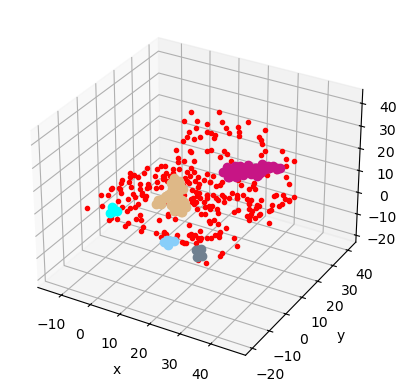

In [30]:
# get the opposite of a selection using 'not', for instance select non-protein objects
ligands = able.select('not protein')
pr.showProtein(ligands)


<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

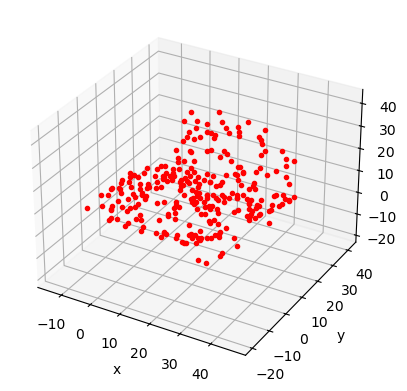

In [31]:
# show just waters
waters = able.select('water')
pr.showProtein(waters)

#### 2.2 - Select based on attributes like residue names, segment names, and b-factors

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

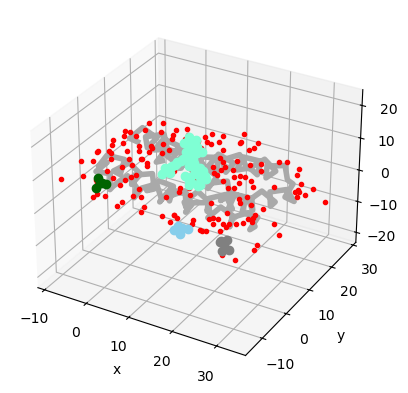

In [32]:
# we can select by things like residue names, chain names, and segment names
chain_A = able.select('chain A')
pr.showProtein(chain_A)

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

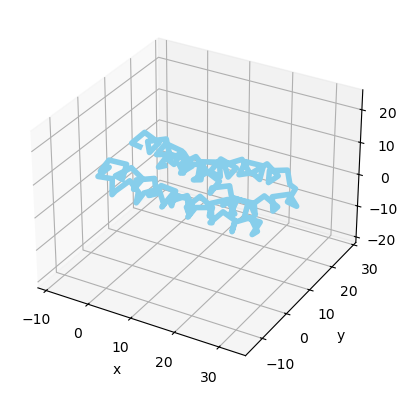

In [33]:
# we can combine selections using 'and'
chain_A_protein_only = able.select('chain A and protein')
pr.showProtein(chain_A_protein_only)

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

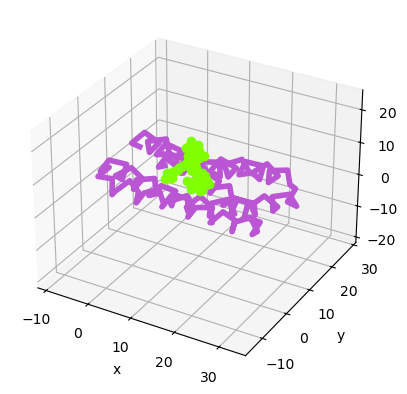

In [41]:
# let's get the protein and the ligand only
# in this case, we know that the ligand resname is GG2
# we ask for all chain A atoms that are either protein or have the resname GG2
protein_ligand = able.select('chain A and (protein or resname GG2)')
pr.showProtein(protein_ligand)

In the case above, we could consider `protein_ligand` to be the 'cleaned up' selection of the protein as it includes just one chain and the small molecule that we care about. We can use this variable from now on instead of `able`. 

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

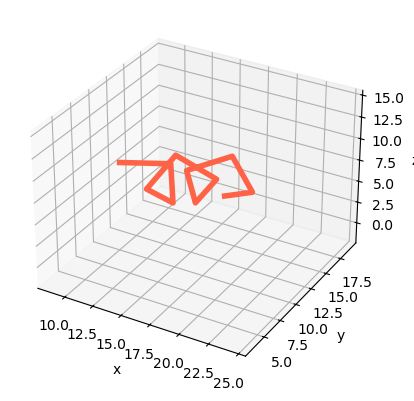

In [42]:
# we can select a subset of residues 
# for instance, we can select all residues from 10 to 20

# in this case, let's use protein_ligand instead of able 
residues_10_to_20 = protein_ligand.select('chain A and resnum 10 to 20')
pr.showProtein(residues_10_to_20)

**mini-exercise:** write a selection string that gets all the glycines in chain B of the structure. Use ProDy to count how many atoms are in this selection.

In [ ]:
# your code goes here 

#### 3.3 - Select a binding site based on atomic distances

In [52]:
# we can also select by distances 
# select all the residues within 5 angstroms of the ligand. these are the binding site residues
binding_site_5A_withH = protein_ligand.select('chain A and protein within 5 of resname GG2')

# however, we normaly want to only select non-hydrogen contacts, so we further define the selection to be only non hydrogen atoms
binding_site_5A = protein_ligand.select('(chain A and protein and not element H) within 5 of (resname GG2 and not element H)')

# we use set() to get the unique values of the resnums and resnames, since the selection has chosen multiple atoms per residue
binding_site_resnums = set(binding_site_5A.getResnums())
binding_site_resnames = set(binding_site_5A.getResnames())

print(f'Resnums of the binding site: {binding_site_resnums}')
print(f'Resnames of the binding site: {binding_site_resnames}')

Resnums of the binding site: {6, 9, 10, 13, 14, 16, 17, 46, 49, 53, 56, 72, 75, 78, 79, 82, 83, 108, 111, 112, 115, 116, 119, 120, 122}
Resnames of the binding site: {'MET', 'TYR', 'GLN', 'LEU', 'ASP', 'PHE', 'LYS', 'THR', 'HIS', 'ALA', 'GLY', 'GLU', 'VAL', 'ILE'}


#### 3.4 - Save a PDB file

Once we have achieved a selection we like, we can save PDB files using the following syntax. Only the atoms in the selection will be saved into the file.

In [59]:
# we will save our cleaned up PDB file with only the protein and ligand

pr.writePDB('able_protein_ligand.pdb', protein_ligand)

'able_protein_ligand.pdb'

**mini-exercise:**  open the saved PDB file in pymol and annotate the binding site by making it a different color, showing the residues as sticks, or showing the atoms as spheres.

Your final pymol session should look something like `able_clean_binding_site_annotated.pse`

tip: you can select multiple residues in pymol by writing `sele resi 1+2+3`. We can print out a string using python below make it easy to copy-paste into the pymol console:

In [55]:
# convert binding_site_resnums into a list of strings
binding_site_resnums_str = [str(resnum) for resnum in binding_site_resnums]
# print the resnums as a string with '+' between them
print('+'.join(binding_site_resnums_str))

6+9+10+13+14+16+17+46+49+53+56+72+75+78+79+82+83+108+111+112+115+116+119+120+122


### 3 - Align PDB files and calculate RMSD

ProDy is very useful in its analysis and manipulation of PDB coordinates. We can also superimpose structures using ProDy to compare their structures more accurately. We can also calculate the RMSD or [root mean squared deviation](https://en.wikipedia.org/wiki/Root_mean_square_deviation_of_atomic_positions) of the atomic coordinates to find out how much two structures differ in structure. 

#### 3.1 - Align PDB files using `pr.calcTransformation` and `pr.applyTransformation`

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

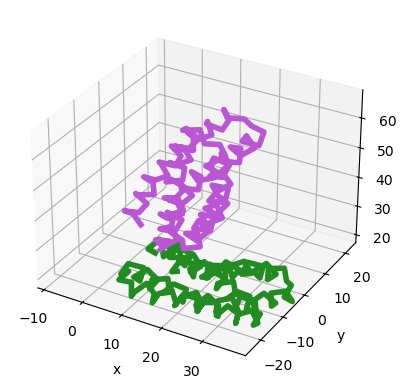

In [62]:
# get protein-only selections of able in its apo and holo form
# apo = without ligand
# holo = with ligand

able_holo_prot = able.select('protein and chain A')
pr.showProtein(able_holo_prot)
able_apo_prot = able_apo.select('protein and chain A')
pr.showProtein(able_apo_prot)


As we can see above, the two proteins have similar shapes but are not aligned in 3D space. We will align them and calculate the RMSD below. 

The standard method for alignment used is the Kabsch algorithm. This minimizes the pairwise distances between all atoms, therefore the number of atoms used in the alignment must be the same.

In [64]:
# get the coordinates of the CA atoms of the holo and apo forms

able_holo_ca_coords = able_holo_prot.ca.getCoords()
able_apo_ca_coords = able_apo_prot.ca.getCoords()

print(f'Shape of holo CA coordinates:{able_holo_ca_coords.shape}')
print(f'Shape of apo CA coordinates: {able_apo_ca_coords.shape}')

Shape of holo CA coordinates:(126, 3)
Shape of apo CA coordinates: (126, 3)


In [65]:
# calculate the transformation matrix
# in ProDy the order is always mobile, target
apo2holo_transform = pr.calcTransformation(able_apo_ca_coords, able_holo_ca_coords)

# apply the transform to able_apo_prot
pr.applyTransformation(apo2holo_transform, able_apo_prot)

<Selection: 'protein and chain A' from 6w6x (1887 atoms)>

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

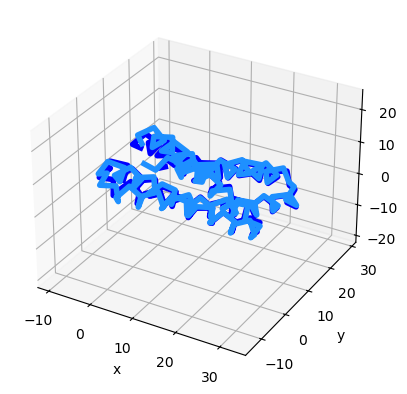

In [66]:
pr.showProtein(able_holo_prot)
pr.showProtein(able_apo_prot)

As you can see above, the apo protein is now aligned with the holo protein. 

**Mini-exercise:** Save the aligned `able_apo_prot` into a PDB file and view it in pymol with the `able_protein_ligand.pdb` file we saved above.

In [ ]:
# write code to save the file here


#### 3.2 - Calculate the RMSD of two proteins using `pr.calcRMSD`

In [68]:
# we will re-define the CA coordinates of our two proteins now that they have been aligned

able_holo_ca_coords = able_holo_prot.ca.getCoords()
able_apo_ca_coords = able_apo_prot.ca.getCoords()

rmsd_holo_apo = pr.calcRMSD(able_holo_ca_coords, able_apo_ca_coords)
print(f'The RMSD (root mean squared deviation) of the ABLE apo to holo forms is {rmsd_holo_apo:.3f}A')


The RMSD (root mean squared deviation) of the ABLE apo to holo forms is 1.105A
